In [1]:
# ==========================================================
# Multiple Linear Regression - Student Performance Prediction
# Complete Data Cleaning + Preprocessing + Outliers + Joblib
# ==========================================================

# -------- Step 1: Import Required Libraries --------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
# -------- Step 2: Load Dataset --------
data = pd.read_csv("Student_Performance.csv")

print("First 5 rows of dataset:")
print(data.head())


First 5 rows of dataset:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [3]:
# -------- Step 3: Dataset Inspection --------
print("\nDataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

print("\nStatistical Summary:")
print(data.describe())



Dataset Shape: (10000, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB

Statistical Summary:
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000    

In [4]:
# -------- Step 4: Data Cleaning --------

# 4.1 Check Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# 4.2 Remove Missing Values
data = data.dropna()

# 4.3 Remove Duplicate Rows
data = data.drop_duplicates()

print("\nShape after cleaning:", data.shape)



Missing Values:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Shape after cleaning: (9873, 6)


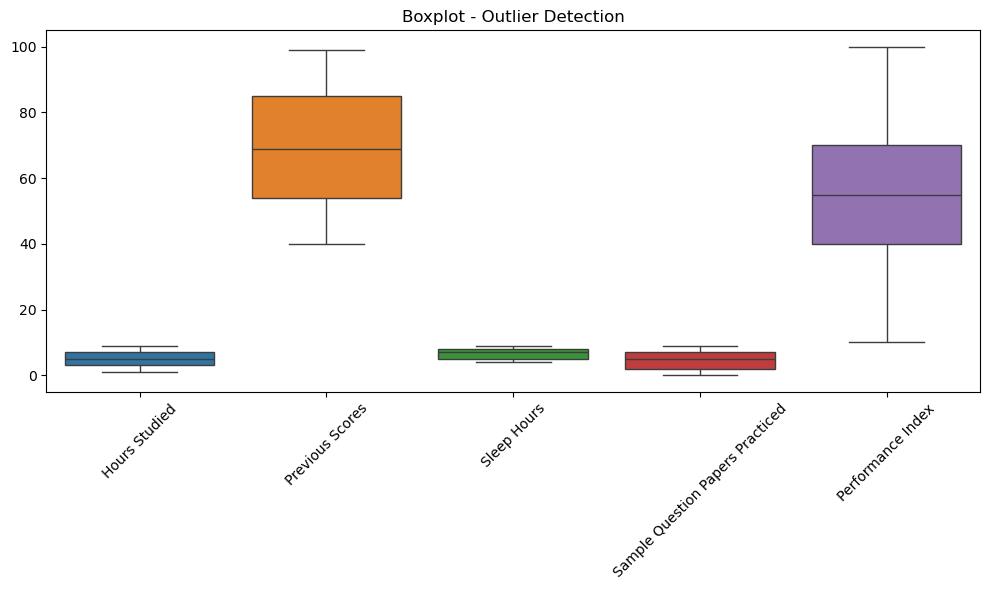

In [5]:
# -------- Step 5: Outlier Detection --------

# Boxplot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Boxplot - Outlier Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# -------- Step 6: Remove Outliers using IQR (NUMERIC ONLY) --------

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Keep rows that are NOT outliers
data = data[~((numeric_data < (Q1 - 1.5 * IQR)) |
              (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nShape after removing outliers:", data.shape)



Shape after removing outliers: (9873, 6)


In [7]:

# -------- Step 7: Feature Selection --------
X = data[['Hours Studied',
          'Previous Scores',
          'Sleep Hours',
          'Sample Question Papers Practiced']]

y = data['Performance Index']



In [8]:
# -------- Step 8: Feature Scaling --------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------- Step 9: Train-Test Split --------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [9]:

# -------- Step 10: Train Model --------
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Training Completed")


Model Training Completed


In [10]:
# -------- Step 11: Prediction --------
y_pred = model.predict(X_test)

print("\nFirst 5 Predictions:")
print(y_pred[:5])

# -------- Step 12: Model Evaluation --------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R² Score (Accuracy): {r2 * 100:.2f}%")


First 5 Predictions:
[46.19748888 80.00489709 60.77355645 22.99534205 75.1200055 ]

Mean Squared Error (MSE): 4.45
R² Score (Accuracy): 98.80%



Mean Squared Error (MSE): 4.45
R² Score (Accuracy): 98.80%


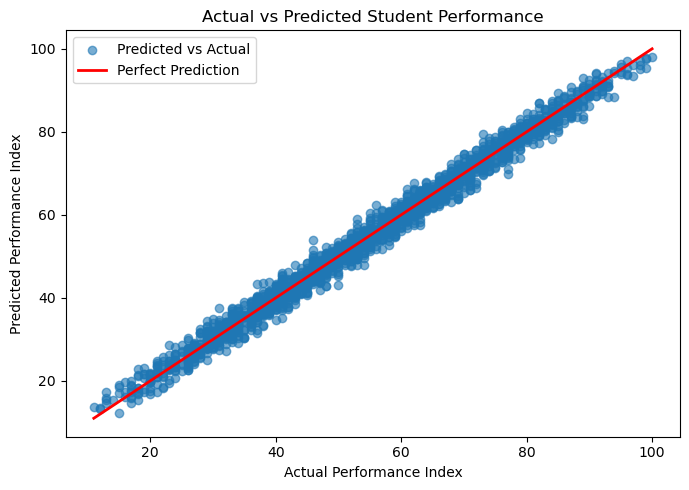

In [11]:
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R² Score (Accuracy): {r2 * 100:.2f}%")

# -------- Step 13: Visualization --------
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Student Performance")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# -------- Step 14: Save Model & Scaler (Joblib) --------
joblib.dump(model, "student_performance_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nModel and scaler saved successfully!")


Model and scaler saved successfully!


In [13]:
# -------- Step 15: Load Saved Model --------
loaded_model = joblib.load("student_performance_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")



In [14]:
# -------- Step 16: New Student Prediction --------
new_student = [[8, 85, 7, 4]]   # Hours, Previous Score, Sleep, Papers
new_student_scaled = loaded_scaler.transform(new_student)

prediction = loaded_model.predict(new_student_scaled)

print(f"\nPredicted Performance Index: {prediction[0]:.2f}")



Predicted Performance Index: 79.74


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
